# Lab 5 Activity

## Review

To calculate a sample size for a specified level of Type II error $\alpha$:

Start with $E = Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$

Then solve for $n =Z_{\alpha/2}^2\frac{\sigma^2}{E^2}$

## Super EASY!

## What about when you want to control the type II error. 

Let's say that you want to figure out an adequate sample size such that the type I error is $\alpha$ big, and the type II error is at most $\beta$. 

For a test at level $\alpha$, the domain of the distribution of the test statistic has both:

"Rejection Region"
$$
R = \{\bar{X} > \mu_0 + Z_{\alpha/2}\sigma_{\bar{X}} \} \cup \{\bar{X} < \mu_0 - Z_{\alpha/2}\sigma_{\bar{X}} \}
$$

"Fail to Reject Region"
$$
FTR = \{|\bar{X} - \mu_0| < Z_{\alpha/2}\sigma_{\bar{X}}  \}
$$

## Lets view this in a plot!

## You do not need to run the following code, it just outputs a plot.

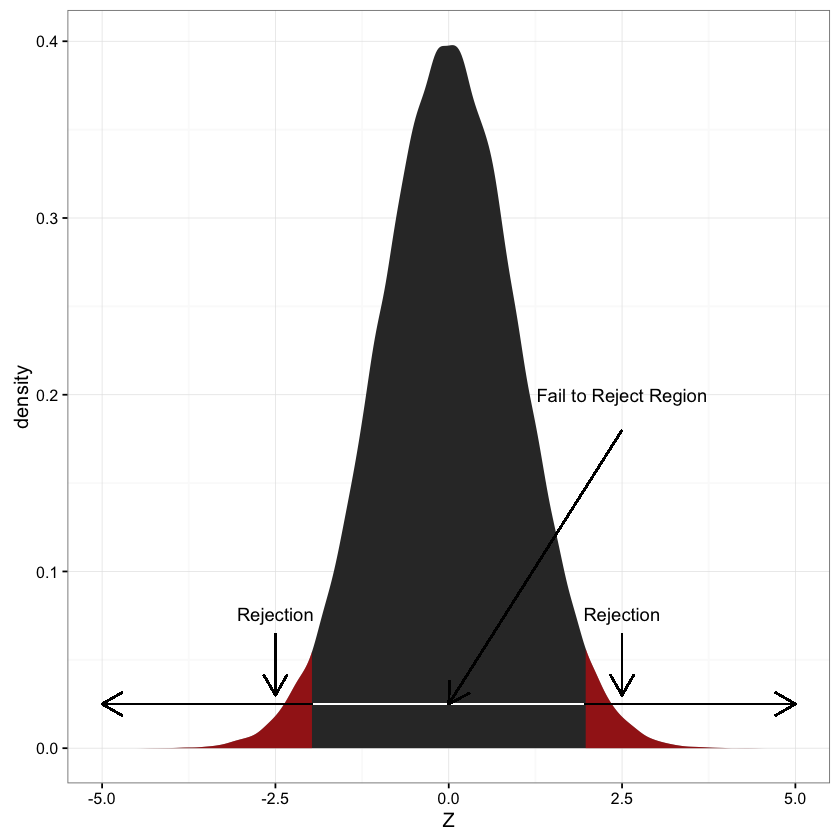

In [10]:
library(data.table)
library(ggplot2)

Z <- rnorm(100000)
dt <- data.table(Z)
#  generate kdf
gg <- dt[,list(x=density(Z)$x, y=density(Z)$y)]
#  calculate quantiles

q1 <- qnorm(0.025)
q2 <- qnorm(0.975)
ggplot(dt) + stat_density(aes(x=Z))  + geom_ribbon(data=subset(gg, x<q1),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5) +
              geom_ribbon(data=subset(gg, x > q2),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5) +
              annotate("text", x = -2.5, y = 0.075, label = c("Rejection"), parse=TRUE) + 
              annotate("text", x = 2.5, y = 0.075, label = c("Rejection"), parse=TRUE) +
              annotate("text", x = 2.5, y = .2, label = c("Fail to Reject Region")) + 
              geom_segment(aes(x = -2.5, y = .065, xend = -2.5, yend = .03), arrow = arrow(length = unit(0.5, "cm"))) + 
              geom_segment(aes(x = 2.5, y = .065, xend = 2.5, yend = .03), arrow = arrow(length = unit(0.5, "cm"))) + 
              geom_segment(aes(x=q1, y=0.025, xend=q2, yend=0.025), color="white") +
              geom_segment(aes(x=q1, y=0.025, xend=-5, yend=0.025), arrow = arrow(length = unit(0.5, "cm"))) +
              geom_segment(aes(x=q2, y=0.025, xend=5, yend=0.025), arrow = arrow(length = unit(0.5, "cm"))) +
              geom_segment(aes(x = 2.5, y = .18, xend = 0, yend = .025), arrow = arrow(length = unit(0.5, "cm"))) + 
              theme_bw()

The white region is the part of the domain of the test statistic that we fail to reject, and the black parts are the region region; They are all values past the critical values of the distribution. 


## Note: $\delta = \frac{\mu_0 - \mu}{\sigma}$
$$
    Power = 1-\beta = P(\bar{X} \in R|\mu \neq \mu_0) = P_{\mu}(\bar{X} \in R) 
$$
$$
          = P(\{\bar{X} > \mu_0 + Z_{\alpha/2}\sigma_{\bar{X}} \} \cup \{\bar{X} < \mu_0 - Z_{\alpha/2}\sigma_{\bar{X}} \}) 
$$
$$
          = P(\bar{X} > \mu_0 + Z_{\alpha/2}\sigma_{\bar{X}})+ P(\bar{X} < \mu_0 - Z_{\alpha/2}\sigma_{\bar{X}}) 
$$
$$
= P(Z > \frac{\mu_0 - \mu}{\sigma_{\bar{X}} + Z_{\alpha/2}}) + P(Z < \frac{\mu_0 - \mu}{\sigma_{\bar{X}}} - Z_{\alpha/2}) 
$$
$$
          \approx P(Z < \sqrt{n}\delta - Z_{\alpha/2}) = 1-\beta 
$$
$$
           \Rightarrow  Z_{1-\beta} = \sqrt{n}\delta - Z_{\alpha/2}
$$
$$         
           \Rightarrow \text{ solve for n} \Rightarrow n = \frac{(Z_{\beta} + Z_{\alpha})^2}{\delta^2}
$$

A better explanation of this formula can be found here: http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf

## Question 1:

A national agency sets recommended daily dietary allowances for many supplements. In particular, the allowance for zinc for males over the age of 50 years is 15 mg /day. The agency would like to determine if the dietary intake of zinc for active males is significantly higher than 15 mg /day. How many males would need to be included in the study if the agency wants to construct an $\alpha=.05$ test with the probability of committing a Type II error to be at most 
$.10$ whenever the average zinc content is 15.3 mg/day or higher? Suppose from previous studies they estimate the standard deviation to be approximately 4 mg/day.

# Part 2 -- Hypothesis Tests!


## Question 2:
A researcher designs a study to test the hypotheses 
$$
H_0: \mu = 28 \text{  versus   }H_a: \mu \neq 28.
$$
A random sample of 50 measurements from the population of interest yields $\bar{y}=25.9$ and $s=5.6$.

1. Using $\alpha=.05$, what conclusions can you make about the hypotheses based on the
sample information?
2. Calculate the probability of making a Type II error if the actual value of $\mu$ is at most 27.
3. Could you have possibly made a Type II error in your decision in part (a)? Explain
your answer.

## Question 3:
Lake Onondaga is a small lake adjacent to Syracuse, NY (my hometown). It is also one of the most poluted lakes in the country, particularly with mercury. Measurements taken on a weekly basis yielded an average of 1.20 mg /m3 (milligrams per cubic meter) with a standard deviation of .32 mg /m3. Following an accident at a smelter on the shore of the lake, 15 measurements produced the following mercury concentrations.
1.60 1.77 1.61 1.08 1.07 1.79 1.34 1.07 1.45 1.59 1.43 2.07 1.16 0.85 2.11

1. Give a point estimate of the mean mercury concentration after the accident.

2. Construct a 95% confidence interval on the mean mercury concentration after the
accident. Interpret this interval.

3. Is there sufficient evidence that the mean mercury concentration has increased since
the accident? Use $\alpha=0.05$

4. Assuming that the standard deviation of the mercury concentration is .32 mg/m3,
calculate the power of the test to detect mercury concentrations of 1.28, 1.32, 1.36, and 1.40.

In [12]:
## ---- Code to set-up the solution to the problem

data <- c(1.60, 1.77, 1.61, 1.08,
  1.07, 1.79, 1.34, 1.07,
  1.45, 1.59, 1.43, 2.07,
  1.16, 0.85, 2.11)


SE <- sd(data)/sqrt(length(data))
alpha <- 0.05
t_alph <- abs(qt(alpha/2,df=length(data)-1))
CI <- mean(data) + c(-1,1)*t_alph*SE


# Pooled Two-Sample T-test

## Use this when you want to look at the difference in means:

1. Population distributions are normal with equal variances 
2. The two random samples are independent.


$$
y_{11}, y_{12}, ..., y_{1n_1} \sim N(\mu_1, \sigma^2)
$$

$$
y_{21}, y_{22}, ..., y_{2n_2} \sim N(\mu_2, \sigma^2)
$$

$$
s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$

$$
D_0 = \mu_1 - \mu_2 
$$
### Test Statistic:
$$
t = \frac{\bar{y}_1 - \bar{y}_2 - D_{0}}{s_p \sqrt{1/n_1 + 1/n_2}} \sim t_{df=n_1 + n_2 - 2}
$$


## Question 4:

An experiment was conducted to evaluate the effectiveness of a treatment for tape- worm in the stomachs of sheep. A random sample of 24 worm-infected lambs of approximately the same age and health was randomly divided into two groups. Twelve of the lambs were injected with the drug and the remaining twelve were left untreated. After a 6-month period, the lambs were slaughtered and the worm counts were recorded below.

In [14]:
treated_sheep <- c(18,43,28,50,16,32,13,35,38,33,6,7)
untreated_sheep <- c(40,54,26,63,21,37,39,23,48,58,28,39)

y_1 <- mean(treated_sheep)
y_2 <- mean(untreated_sheep)

s_1 <- sd(treated_sheep)
s_2 <- sd(untreated_sheep)

n_1 <- length(y_1)
n_2 <- length(y_2)

## --- pooled standard error
s_p <- sqrt(((n_1-1)*s_1^2 + (n_2 - 1)*s_2^2)/(n_1 + n_2 - 2))

## --- finish the rest!

1. Test whether the mean number of tape worms in the stomachs of the treated lambs is less than the mean for untreated lambs. Use an $\alpha=0.05$ test.
2. What is the level of significance for this test?
3. Place a 95% confidence interval on $\mu_1-\mu_2$ to assess the size of the difference in the two means.

## We can also use the t.test function in R!

In [19]:
t.test(x=treated_sheep, y=untreated_sheep, alternative = "less")


	Welch Two Sample t-test

data:  treated_sheep and untreated_sheep
t = -2.2709, df = 21.972, p-value = 0.01665
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -3.189613
sample estimates:
mean of x mean of y 
 26.58333  39.66667 


# Lets Talk about Type II and Type I error

## Question 5: If Type I error increases, what does Type II error do?


Warning message:
: Width not defined. Set with `position_dodge(width = ?)`

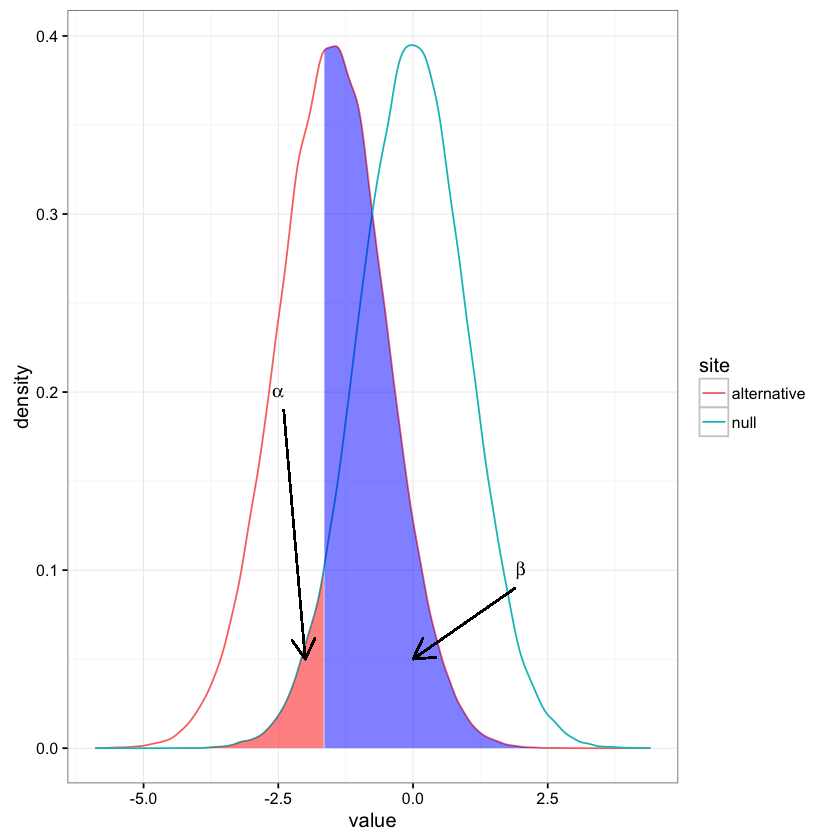

In [21]:
alpha <- 0.05
mu_a <- 6800
mu_0 <- 7400
n <- 121
se <- 4400/sqrt(n)

ncp <- abs((mu_0-mu_a)/se)
beta <- pnorm(abs(qnorm(alpha)) - ncp)
#  same data, just renaming columns for clarity later on
#  also, use data tables
library(data.table)
library(ggplot2)
set.seed(1)
n <- 121
se <- 4400/sqrt(n)

ncp_t <- (mu_a - mu_0)/se
value <- c(rt(100000, df=n-1), rt(100000, df=n-1, ncp = ncp_t))
site  <- c(rep("null", 100000), rep("alternative", 100000))
dt    <- data.table(site,value)
#  generate kdf
gg <- dt[,list(x=density(value)$x, y=density(value)$y),by="site"]
#  calculate quantiles
q1 <- quantile(dt[site=="null",value],0.05)
q2 <- quantile(dt[site=="alternative",value],1-beta)
# generate the plot
ggplot(dt) + stat_density(aes(x=value,color=site),geom="line",position="dodge")+
  geom_ribbon(data=subset(gg,site=="null" & x<q1),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5)+
  geom_ribbon(data=subset(gg,site=="alternative" & x>q2),
              aes(x=x,ymax=y),ymin=0,fill="blue", alpha=0.5) +
  annotate("text", x = -2.5, y = 0.2, label = c("alpha"), parse=TRUE) + 
  annotate("text", x = 2, y = 0.1, label = c("beta"), parse=TRUE) + 
  geom_segment(aes(x = -2.4, y = .19, xend = -2, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  geom_segment(aes(x = 1.9, y = .09, xend = 0, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  theme_bw() 

Warning message:
: Width not defined. Set with `position_dodge(width = ?)`

[1] 0.4484331

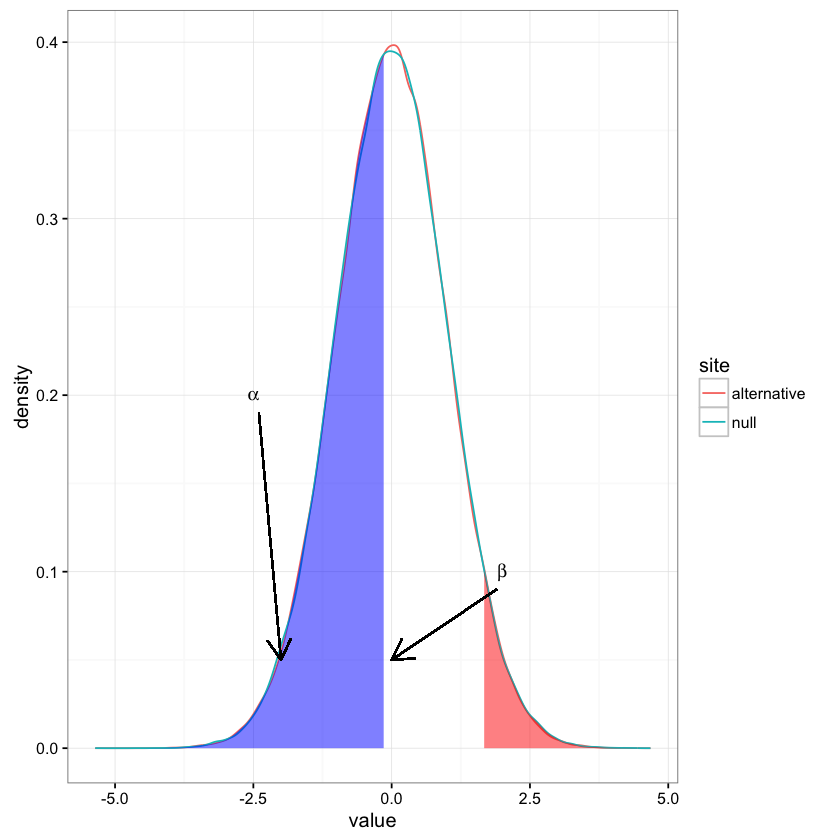

In [4]:
alpha <- 0.05
mu_a <- .74
mu_0 <- .72
n <- 381
se <- .22/sqrt(n)

ncp <- abs((mu_0-mu_a)/se)
beta <- pnorm(abs(qnorm(alpha)) - ncp)
#  same data, just renaming columns for clarity later on
#  also, use data tables
library(data.table)
library(ggplot2)
set.seed(1)
n <- 121
se <- 4400/sqrt(n)

ncp_t <- (mu_0 - mu_a)/se
value <- c(rt(100000, df=n-1), rt(100000, df=n-1, ncp = ncp_t))
site  <- c(rep("null", 100000), rep("alternative", 100000))
dt    <- data.table(site,value)
#  generate kdf
gg <- dt[,list(x=density(value)$x, y=density(value)$y),by="site"]
#  calculate quantiles
q1 <- quantile(dt[site=="null",value],.95)
q2 <- quantile(dt[site=="alternative",value],beta)
# generate the plot
ggplot(dt) + stat_density(aes(x=value,color=site),geom="line",position="dodge")+
  geom_ribbon(data=subset(gg,site=="null" & x>q1),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5)+
  geom_ribbon(data=subset(gg,site=="alternative" & x<q2),
              aes(x=x,ymax=y),ymin=0,fill="blue", alpha=0.5) +
  annotate("text", x = -2.5, y = 0.2, label = c("alpha"), parse=TRUE) + 
  annotate("text", x = 2, y = 0.1, label = c("beta"), parse=TRUE) + 
  geom_segment(aes(x = -2.4, y = .19, xend = -2, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  geom_segment(aes(x = 1.9, y = .09, xend = 0, yend = .05), arrow = arrow(length = unit(0.5, "cm"))) + 
  theme_bw() 


beta

## Question 6

PCBs have been in use since 1929, mainly in the electrical industry, but it was not until the 1960s that they were found to be a major environmental contaminant. In the paper “The ratio of DDE to PCB concentrations in Great Lakes herring gull eggs and its use in interpreting contaminants data” [appearing in the Journal of Great Lakes Research 24 (1): 12–31, 1998], researchers report on the following study. Thirteen study sites from the five Great Lakes were selected. At each site, 9 to 13 herring gull eggs were collected randomly each year for several years. Following collection, the PCB content was determined. The mean PCB content at each site is reported in the following table for the years 1982 and 1996.

1. 61.48 64.47 45.50 59.70 58.81 75.86 71.57 38.06 30.51 39.70 29.78 66.89 63.93 


2. 13.99 18.26 11.28 10.02 21.00 17.36 28.20 7.30 12.80 9.41 12.63 16.83 22.74



1. Legislation was passed in the 1970s restricting the production and use of PCBs. Thus, the active input of PCBs from current local sources has been severely curtailed. Do the data provide evidence that there has been a significant decrease in the mean PCB content of herring gull eggs?
2. Estimate the size of the decrease in mean PCB content from 1982 to 1996, using a 95% confidence interval.
3. Evaluate the conditions necessary to validly test hypotheses and construct confidence intervals using the collected data.
4. Does the independence condition appear to be violated?